<a href="https://colab.research.google.com/github/ioahKwon/Machine-Learning-Deep-Learning/blob/master/%5B%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B3%BC%EB%94%A5%EB%9F%AC%EB%8B%9D%5D_Week_14_(Final)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[머신러닝과딥러닝] 수업 정리 Week #14**

### _2020.08._ SKKU Lecture Summary by IOAH


드디어 마지막이다! 조금만 더 힘내보자ㅎㅎ

---





### 1. 기본적인 오토인코더 모형 구현

이번 실습에서는 입력변수로부터 reconstruction하는 과정을 통해 특성을 추출하는데 활용되는 오토인코더를 구현하고 학습시킨다. 우선 인풋 이미지는 한 인스턴스 당 28*28개의 feature를 가지므로 shape을 784로 정해준 다음 인코더와 디코더를 각각 한 층으로 쌓아준다. 최종 오토인코더 모형은 인풋부터 인코더-디코더-아웃풋으로 연결된다.

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32 

#인풋이미지는 한 인스턴스 당 28x28=784개의 feature를 가지므로 shape을 다음과 같이 정해준다.
input_img = Input(shape=(784,))

#인코더와 디코더를 각각 한 층으로 쌓아준다.
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

#최종 오토인코더 모형은 인풋부터 인코더, 디코더의 아웃풋까지 연결해준다.
autoencoder = Model(input_img, decoded)

물론 아래처럼 인코더와 디코더를 분리해서 정의하는 것도 가능하다. 그 다음 오토인코더 모델에 optimizer는 adam으로, loss function은 binary_crossentropy로 모델을 컴파일한다.

In [ ]:
#다음과 같이 인코더와 디코더를 분리해서 정의해놓는 것도 가능하다.
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

그 후 케라스의 MNIST 데이터를 로드하고 입력 데이터를 변수에 저장한다. 입력값들을 정규화한후 이 이미지 데이터를 784 크기로 벡터화한다. 이 과정은 생성된 오토인코더와 같은 인풋 차원을 가지도록 MNIST의 x값들을 reshape 해주는 것이다.

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#MNIST dataset의 x입력값들을 28x28=784의 크기로 벡터화한다.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


이후 오토인코더 모형을 학습시키고 loss 값과 validation loss를 구한다.

In [ ]:
#위에서 정의한 오토인코더 모형 학습
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2729 - val_loss: 0.1880
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1698 - val_loss: 0.1525
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1432 - val_loss: 0.1327
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1278 - val_loss: 0.1206
Epoch 5/50
235/235 [==============================] - 2s 11ms/step - loss: 0.1179 - val_loss: 0.1125
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1111 - val_loss: 0.1070
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1062 - val_loss: 0.1026
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1024 - val_loss: 0.0994
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0996 - val_loss: 0.0970
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0976 - val_lo

50번 정도의 epoch을 실행시키면 loss 값은 약 0.09로 형성이 되는 것을 확인할 수 있다. 그리고 위에서 분리했던 디코더 모델의 아웃풋과 x_test 원본 데이터를 각각 28x28 이미지 데이터로 reshape하여 시각화하면 아래와 같다. 

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

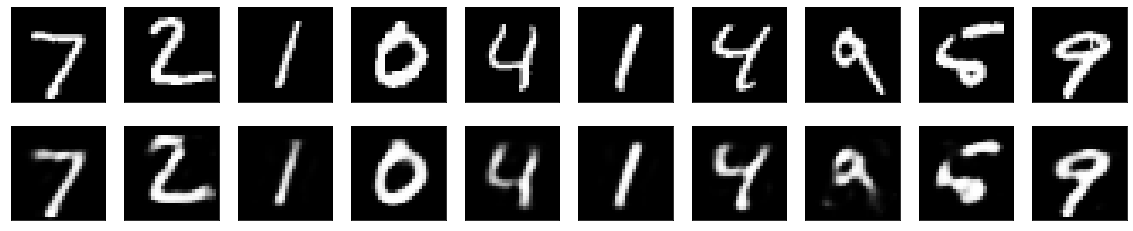

In [ ]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

결과에서도 알 수 있듯이 test 원본 데이터와 거의 유사한 아웃풋을 얻었음을 확인할 수 있다.

### 2. 심층 오토인코더 모형 구현

이번에는 Deep Autoencoder 모형 구현을 해보도록 하겠다. 기본적인 오토인코더와 동일하게 진행하되, 오토인코더 모형 생성 시 layer를 더 deep하게 쌓는다.

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:
#기본적인 오토인코더에서 인코더 및 디코더를 더 깊은 층으로 구성한다.
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [ ]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 3s 12ms/step - loss: 0.2403 - val_loss: 0.1634
Epoch 2/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1466 - val_loss: 0.1312
Epoch 3/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1260 - val_loss: 0.1195
Epoch 4/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1186 - val_loss: 0.1147
Epoch 5/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1141 - val_loss: 0.1110
Epoch 6/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1108 - val_loss: 0.1077
Epoch 7/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1078 - val_loss: 0.1054
Epoch 8/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1052 - val_loss: 0.1027
Epoch 9/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1028 - val_loss: 0.1006
Epoch 10/100
235/235 [==============================] - 3s 12ms/step - loss: 0.100

총 100 epoch을 돌리면 loss 값은 대략 0.08의 값을 보인다. 그럼 이제 위와 동일하게 오토인코더의 아웃풋과 test data 원본 데이터를 각각 28*28 이미지 데이터로 reshape하여 시각화하면 아래와 같다.

In [ ]:
#오토인코더의 아웃풋을 변수에 저장
decoded_imgs = autoencoder.predict(x_test)

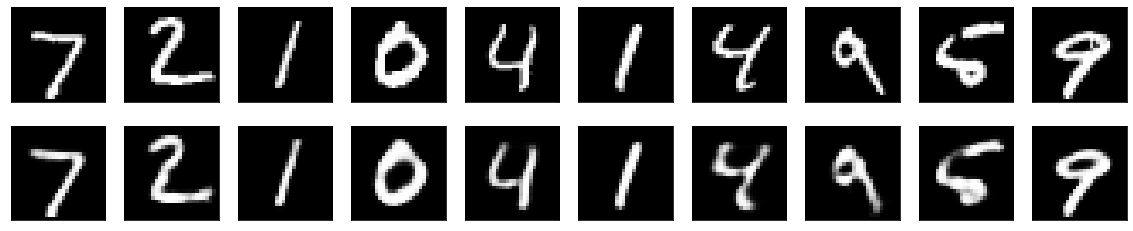

In [ ]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

그냥 봐서는 1번과 큰 차이가 없어 보이지만 확대해서 보면 약간 detail적으로 성능이 향상된 것을 확인할 수 있다.

### 3. CNN 기반의 컨볼루션 오토인코더 모형 구현

컨볼루션 오토인코더는 심층 오토인코더가 MLP가 아닌 CNN으로 구성된다고 생각하면 된다. 따라서 Input이 1,2처럼 벡터가 아닌 이미지 형태로 들어간다. 또한 오토인코더 모형 생성 시 Dense 함수가 아닌 Conv2D 함수가 쓰이며 또한 maxpooling을 통해 pooling layer도 추가해준다. 그리고 모델을 쌓고 학습시킨 뒤 결과를 살펴보자.

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

#컨볼루션 오토인코더에서는 인풋이 이미지 그대로 들어간다. (28x28)
#기본적인 오토인코더가 MLP 모형으로 이루어졌다면, 컨볼루션 오토인코더는 CNN(Convolutional Neural Networks)으로 이루어졌다고 볼 수 있다.

input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1)) 

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=1024,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
59/59 [==============================] - 2s 27ms/step - loss: 0.4373 - val_loss: 0.2822
Epoch 2/50
59/59 [==============================] - 1s 20ms/step - loss: 0.2369 - val_loss: 0.2106
Epoch 3/50
59/59 [==============================] - 1s 21ms/step - loss: 0.1952 - val_loss: 0.1815
Epoch 4/50
59/59 [==============================] - 1s 21ms/step - loss: 0.1735 - val_loss: 0.1643
Epoch 5/50
59/59 [==============================] - 1s 20ms/step - loss: 0.1596 - val_loss: 0.1534
Epoch 6/50
59/59 [==============================] - 1s 20ms/step - loss: 0.1510 - val_loss: 0.1466
Epoch 7/50
59/59 [==============================] - 1s 20ms/step - loss: 0.1450 - val_loss: 0.1414
Epoch 8/50
59/59 [==============================] - 1s 20ms/step - loss: 0.1403 - val_loss: 0.1371
Epoch 9/50
59/59 [==============================] - 1s 20ms/step - loss: 0.1363 - val_loss: 0.1336
Epoch 10/50
59/59 [==============================] - 1s 21ms/step - loss: 0.1329 - val_loss: 0.1305
Epoch 11/

50 epoch 정도를 돌리면 loss 값은 약 0.10정도로 나타난다. 1,2 보다는 loss 값이 소폭 커졌다. 이후 다시 디코더의 아웃풋과 원본 데이터를 각각 28*28 이미지 데이터로 reshape하여 시각화하면 아래와 같다.

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

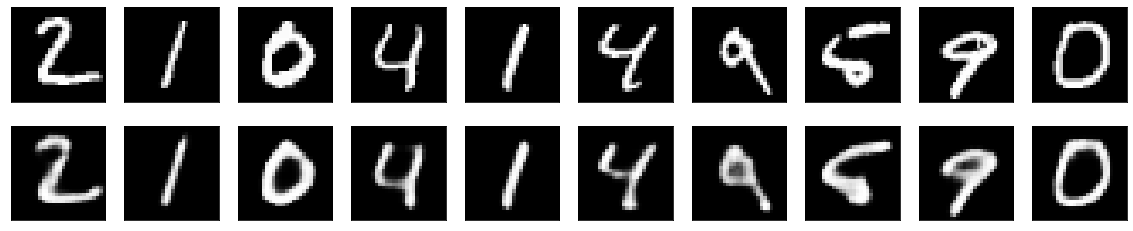

In [ ]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n+1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### 4. 노이즈를 제거하는 디노이징 오토인코더 모형 구현

마지막 실습이다. 위의 1,2,3은 다 결과값이 원본 이미지로부터 바로 추출됐지만 만약 원본 이미지 자체에 노이즈가 끼여 있으면 아마 선명한 아웃풋을 얻을 수 없을 것이다. 이번에는 노이즈를 제거하는 디노이징 오토인코더를 구현해보도록 하겠다. 디노이징 오토인코더를 구현하기 위해 MNIST 데이터에 가우스 노이즈를 부여한다. 노이즈는 noise factor함수를 이용하여 추가할 수 있다. 이렇게 만들어진 데이터를 우선 시각화해보자.

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
#컨볼루션 오토인코더를 활용하여 Denoising
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1)) 

In [ ]:
#가우스 노이즈 데이터 생성
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0, 1)
x_test_noisy = np.clip(x_test_noisy, 0, 1)

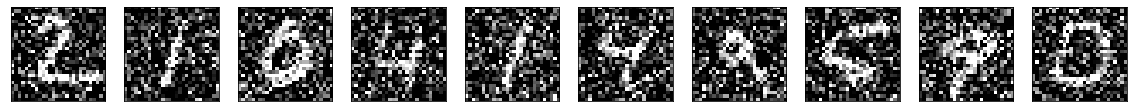

In [ ]:
#노이즈 데이터 시각화
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

이미지에 가우스 노이즈 데이터 잘 끼여있는 것을 볼 수 있다. 그다음 3번에서 했던 컨볼루션 오토인코더를 이용한다. 컨볼루션 오토인코더는 심층 오토인코더에 비해 인풋을 이미지로 바로 받을 수 있다. Convolutional autoencoder를 정의하고 epoch을 50번 정도 학습시켜준다.

In [ ]:
#컨볼루션 오토인코더를 활용
#Deep autoencoder를 활용해도 된다.(이 경우 인풋을 784로 맞춰야 한다.) 

from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=1024,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/50
59/59 [==============================] - 2s 39ms/step - loss: 0.3603 - val_loss: 0.2065
Epoch 2/50
59/59 [==============================] - 2s 33ms/step - loss: 0.1751 - val_loss: 0.1537
Epoch 3/50
59/59 [==============================] - 2s 33ms/step - loss: 0.1452 - val_loss: 0.1359
Epoch 4/50
59/59 [==============================] - 2s 33ms/step - loss: 0.1328 - val_loss: 0.1271
Epoch 5/50
59/59 [==============================] - 2s 33ms/step - loss: 0.1262 - val_loss: 0.1221
Epoch 6/50
59/59 [==============================] - 2s 33ms/step - loss: 0.1219 - val_loss: 0.1194
Epoch 7/50
59/59 [==============================] - 2s 33ms/step - loss: 0.1192 - val_loss: 0.1167
Epoch 8/50
59/59 [==============================] - 2s 33ms/step - loss: 0.1170 - val_loss: 0.1148
Epoch 9/50
59/59 [==============================] - 2s 33ms/step - loss: 0.1155 - val_loss: 0.1136
Epoch 10/50
59/59 [==============================] - 2s 33ms/step - loss: 0.1141 - val_loss: 0.1132
Epoch 11/

결과를 살펴보자. 총 50 epoch을 학습시켜본 결과 loss 값은 대략 0.10 정도로 나타난다. 3번 실습과 비슷한 수치이다. 위 학습된 모델에 test 데이터를 넣고 이를 시각화한다.

In [ ]:
decoded_imgs = autoencoder.predict(x_test_noisy)

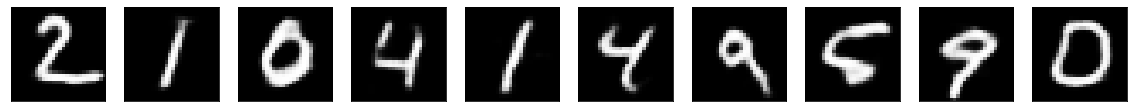

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

노이즈 데이터를 넣었을 때 모델을 학습시킨 후 다시 보면 확실히 여러 층의 convolutional autoencoder를 쌓은 덕분인지 노이즈가 확실히 많이 제거되는 것을 확인할 수 있다.

# 에필로그...

이번 도전학기 수업과 실습을 통해 머신러닝과 딥러닝에 대해 정말 많은 것을 배우고 또 내 스스로도 많이 성장할 수 있었다. 이런 좋은 기회를 마련해주신 손영두 교수님과 학교에게 정말 감사드린다.

할 수 있다는 믿음!

내가 생각한 대로, 꿈꾸는 대로 이루어질 것이다.

항상 겸손하고, 성실하게 노력하자.

화이팅!

 - 2020.09. 대구에서 빛나는 미래를 꿈꾸며.